## Details about the project already in copy

- RGB imaages
- variable size images so need to scale to particular size
- 2 classes

DataSet has following:

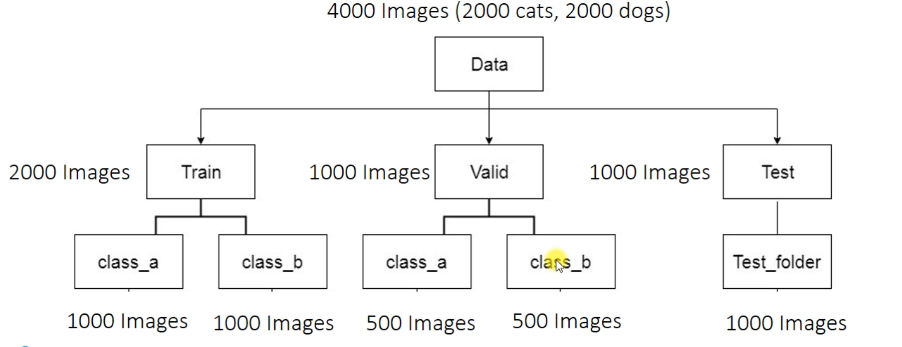

In [18]:
from IPython.display import Image
image_path = './img2.png'
Image(filename=image_path)


We will have 4 convolutional layers and validation accuracy 70%

Process:
- CNN with small dataset (71%)
- CNN with data augmentation (80+%)
- Transfer Learning (90%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = './train'
test_dir = './test'
validation_dir = './validation'

### Preprocess - IMP here

- Read files
- Decode JPEG into RGB grids of pixels
- Convert into floating point tensors
- Rescale pixel values between 0 and 255 to 0 and 1 interval - normalisation

A tensor is a multi-dimensional array that is commonly used in deep learning and other scientific computing applications. By converting the pixel values into a tensor, we can more easily apply mathematical operations to the image data and perform operations such as convolution, pooling, and other transformations commonly used in neural networks.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# generating batches of tensor image data 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,  
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- binary classification since - dog and cat
- setting a fixed image size - 150*150
- batch size is 20 : This means that during the training process, the model will receive 20 images at a time for each training step. 

### Model

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

- RMSprop is a type of optimization algorithm commonly used in neural networks for gradient descent. It stands for Root Mean Square Propagation and its main purpose is to improve convergence and stability during training.

In [27]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=20,
            validation_data=test_generator,
            validation_steps=50)

C:\Users\USER\AppData\Local\Temp\ipykernel_13012\117844917.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 83s 820ms/step - loss: 0.6940 - acc: 0.5170 - val_loss: 0.6941 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 65s 648ms/step - loss: 0.6815 - acc: 0.5610 - val_loss: 0.6803 - val_acc: 0.5520
Epoch 3/20
100/100 [==============================] - 65s 651ms/step - loss: 0.6687 - acc: 0.5865 - val_loss: 0.6585 - val_acc: 0.6360
Epoch 4/20
100/100 [==============================] - 65s 653ms/step - loss: 0.6383 - acc: 0.6390 - val_loss: 0.6397 - val_acc: 0.6560
Epoch 5/20
100/100 [==============================] - 65s 645ms/step - loss: 0.6097 - acc: 0.6730 - val_loss: 0.6263 - val_acc: 0.6550
Epoch 6/20
100/100 [==============================] - 63s 631ms/step - loss: 0.5774 - acc: 0.6995 - val_loss: 0.6182 - val_acc: 0.6590
Epoch 7/20
100/100 [==============================] - 64s 637ms/step - loss: 0.5550 - acc: 0.7230 - val_loss: 0.5854 - val_acc: 0.7030
Epoch 8/20
100/100 [==============================] - 6

- validation folder 1000 images and batch size is 20 so 1000/20
- steps per epoch = total images / batchsize = 2000/20

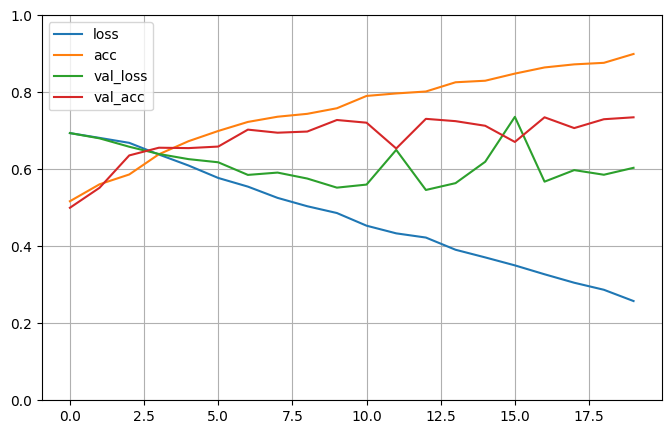

In [29]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

overfitting

In [30]:
model.save('cats_and_dogs_small_1.h5')

In [31]:
from tensorflow.keras import backend as K
K.clear_session()
del model 

### Data Augmentation

We make dummy data using
- shearing
- scaling
- rotation

In [51]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='binary')
                    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # dropout layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', 
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

- DropOut layer deactivates 50% neurons in each layer

In [53]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=50,
            epochs=3,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/3


C:\Users\USER\AppData\Local\Temp\ipykernel_24196\1270267136.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


50/50 [==============================] - 44s 865ms/step - loss: 0.6984 - acc: 0.4990 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 2/3
50/50 [==============================] - 41s 814ms/step - loss: 0.6929 - acc: 0.5210 - val_loss: 0.6935 - val_acc: 0.4870
Epoch 3/3
50/50 [==============================] - 40s 801ms/step - loss: 0.6925 - acc: 0.5210 - val_loss: 0.6860 - val_acc: 0.5750


In [54]:
model.save('cats_and_dogs_small_2.h5')

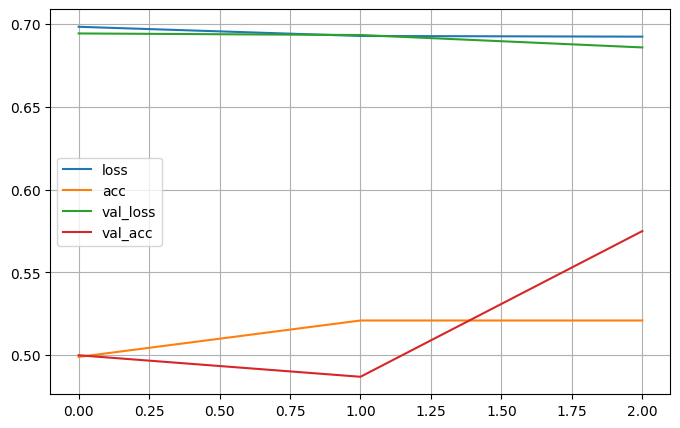

In [55]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

### Transfer Learning using VGG16 Model

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
                                    
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,  
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150,150,3))

58889256/58889256 [==============================] - 16s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
# if we want to freeze the convolutional base, we need to set its trainable attribute to False
conv_base.trainable = False

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=2e-5),
                metrics=['acc'])

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Cat_Dog_VGG16.h5", save_best_only=True)

In [18]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=2,
            validation_data=test_generator,
            validation_steps=50,
            callbacks=[checkpoint_cb])


C:\Users\USER\AppData\Local\Temp\ipykernel_1604\3694779941.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/2
100/100 [==============================] - 297s 3s/step - loss: 0.6117 - acc: 0.6710 - val_loss: 0.4692 - val_acc: 0.7880
Epoch 2/2
100/100 [==============================] - 251s 3s/step - loss: 0.5017 - acc: 0.7705 - val_loss: 0.3946 - val_acc: 0.8310


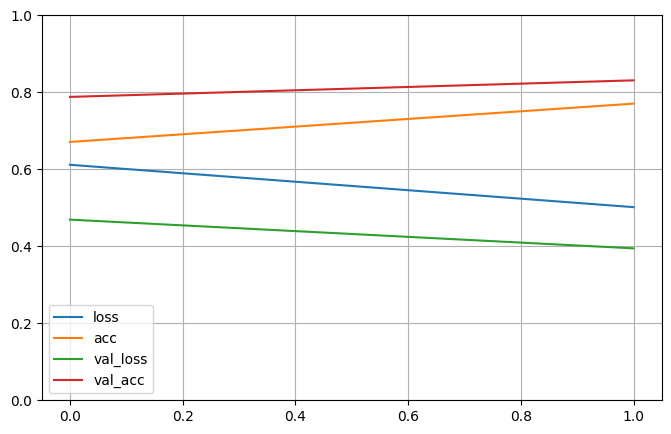

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate_generator(test_generator, steps=50)

C:\Users\USER\AppData\Local\Temp\ipykernel_1604\421928545.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=50)


[0.3946486711502075, 0.8309999704360962]